Linear Regression - Traffic Density Prediction:
MAE: 0.05779745133880876
MSE: 0.005292979938494648
R-squared: 0.22925031450902467


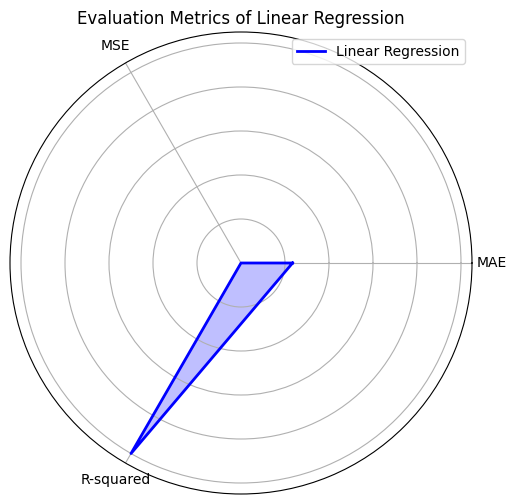

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('cleaned_sample.csv')

# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Feature scaling
scaler = StandardScaler()
features = df.drop(['Traffic Density'], axis=1)
target = df['Traffic Density']
scaled_features = scaler.fit_transform(features)

# Add polynomial features
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(scaled_features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(poly_features, target, test_size=0.2, random_state=42)

# Initialize Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Make predictions
predictions_linear = linear_regressor.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, predictions_linear)
mse_linear = mean_squared_error(y_test, predictions_linear)
r2_linear = r2_score(y_test, predictions_linear)

# Print evaluation results
print('Linear Regression - Traffic Density Prediction:')
print(f'MAE: {mae_linear}')
print(f'MSE: {mse_linear}')
print(f'R-squared: {r2_linear}')

# Visualize the results in a radar chart
metrics = ['MAE', 'MSE', 'R-squared']
values = [mae_linear, mse_linear, r2_linear]

# Normalize the values to be on the same scale
values = np.array(values)
values = (values - np.min(values)) / (np.max(values) - np.min(values))

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles.append(angles[0])

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2, label='Linear Regression')
ax.set_yticklabels([])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

plt.title('Evaluation Metrics of Linear Regression')
plt.legend(loc='upper right')
plt.show()
